Necessary imports:

In [1]:
import pandas as pd
from sklearn.metrics import classification_report
from plot_utils import draw_plots
from plot_drawer import PlotDrawer
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

Reading data from the internet to view sime statistics info

In [2]:
data = pd.read_json('./deviation.json')

Drawing plots

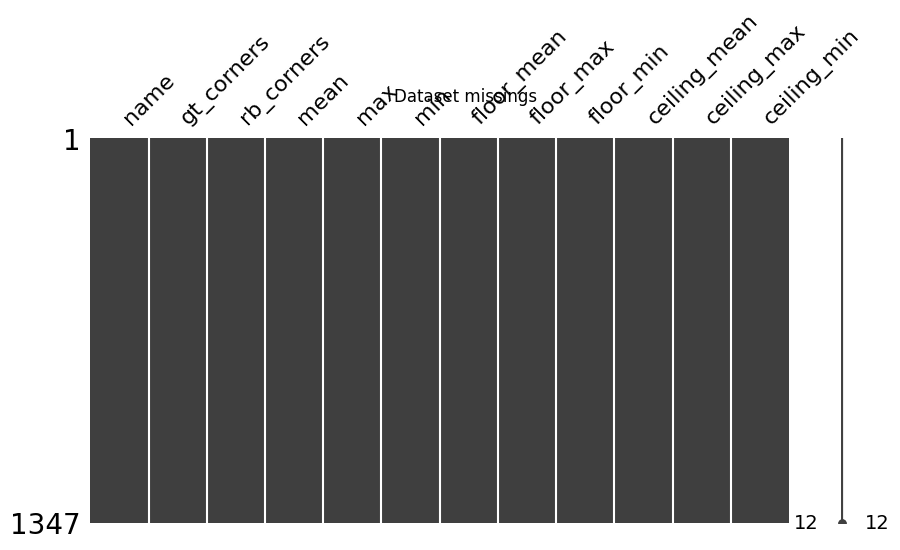

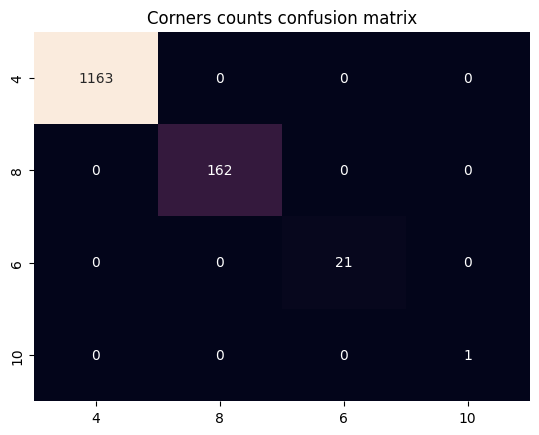

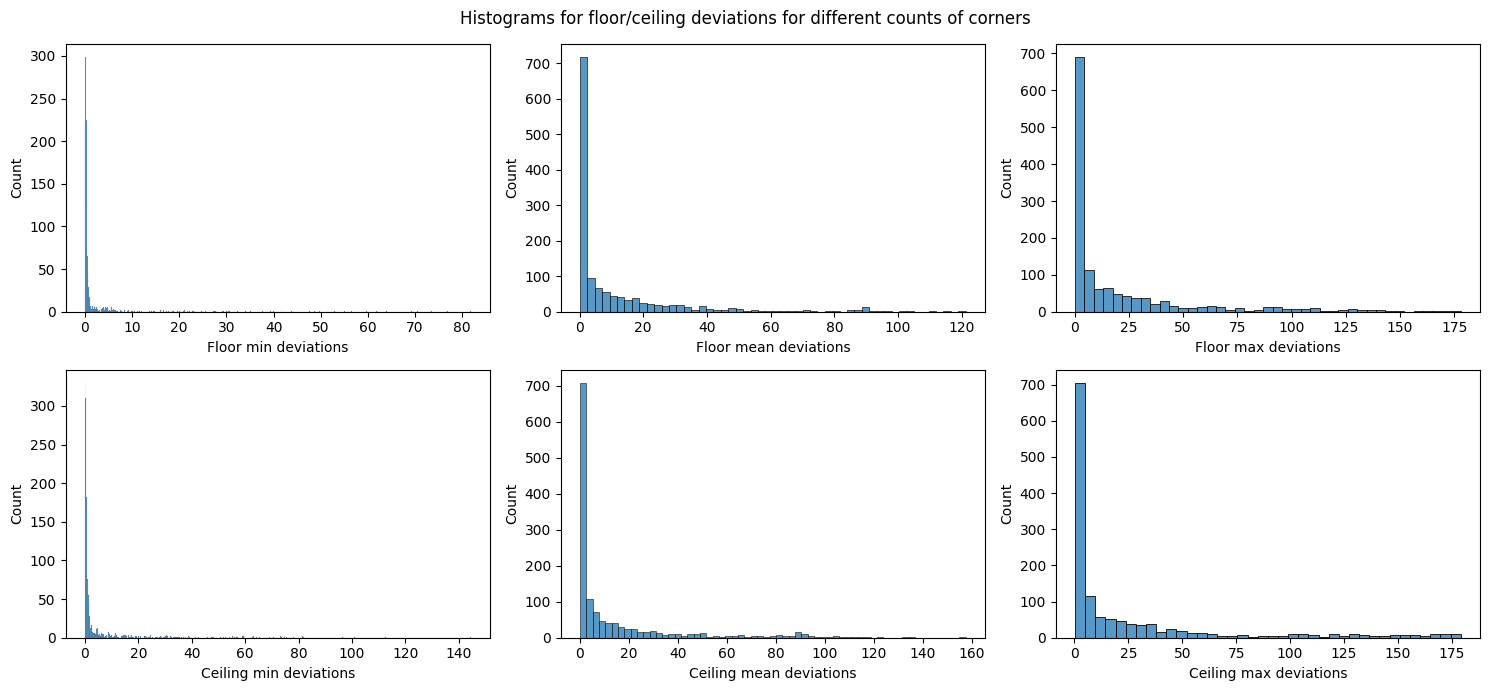

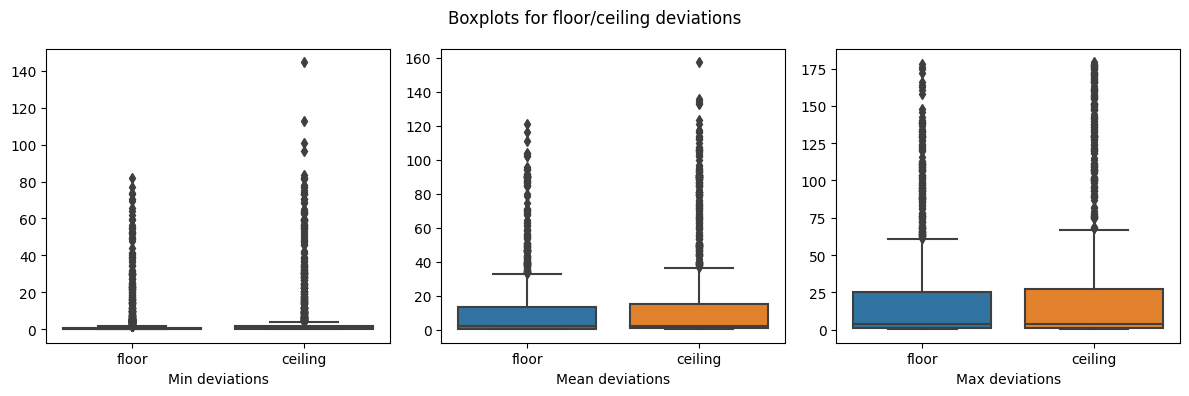

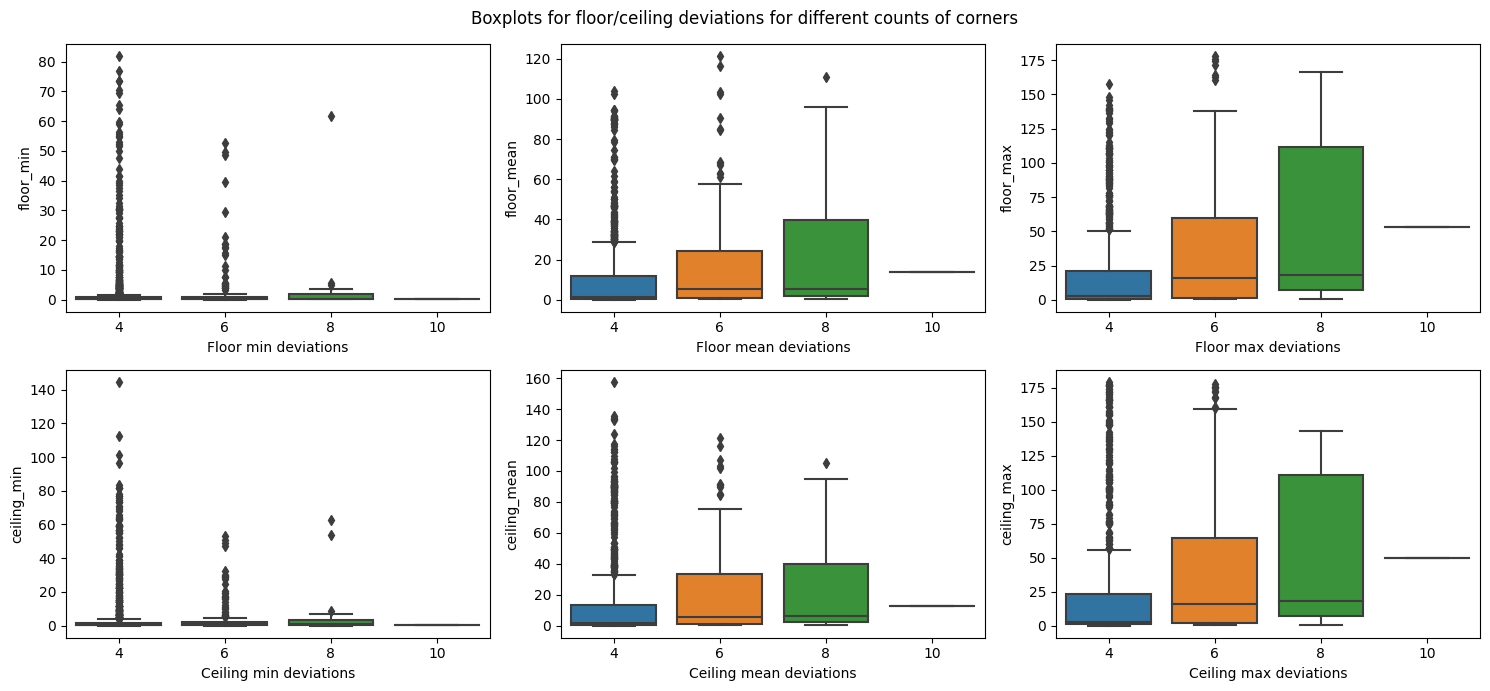

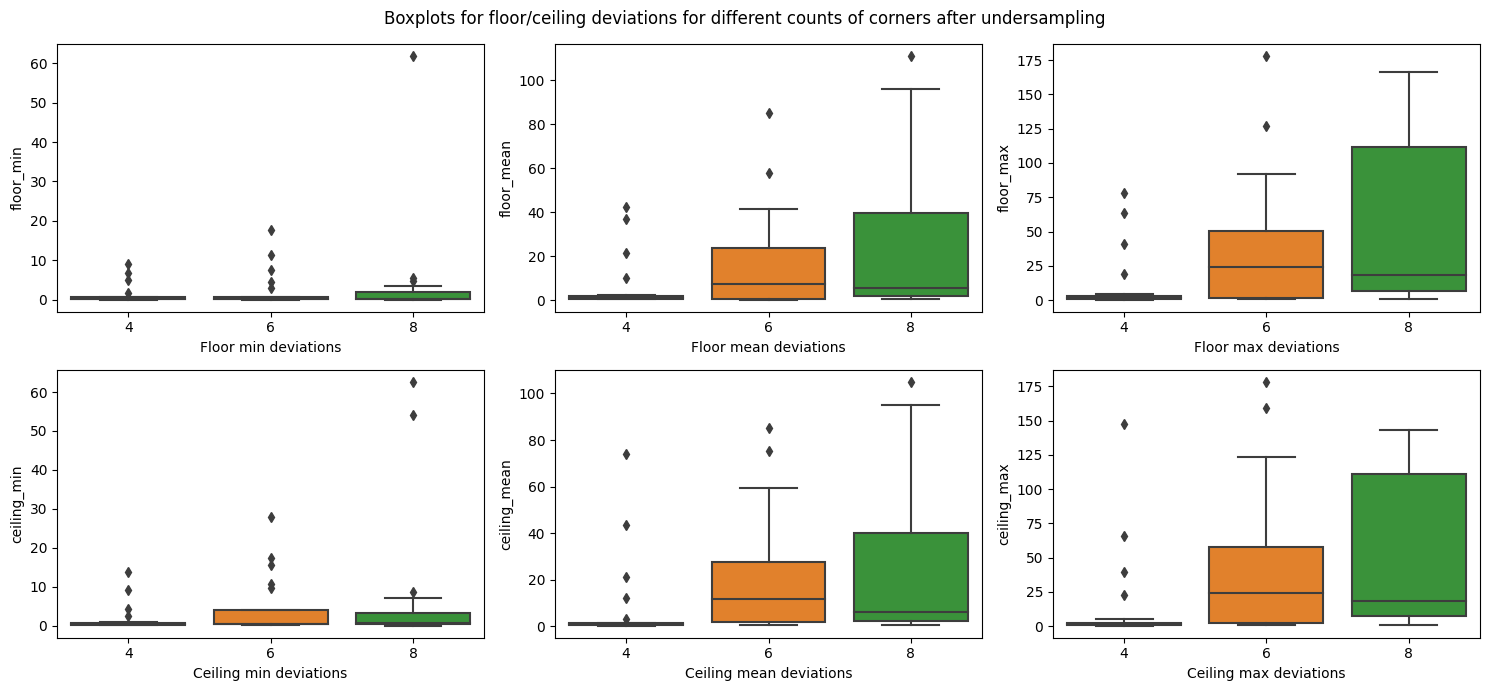

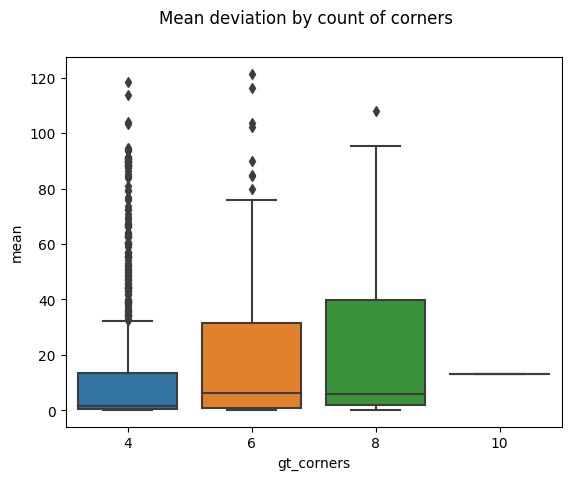

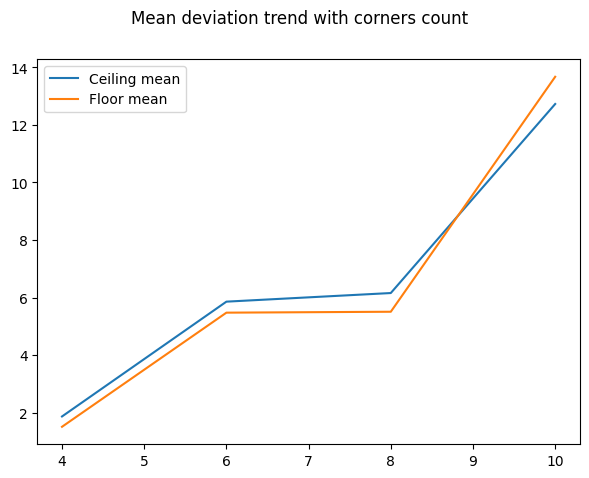

In [3]:
draw_plots('./deviation.json', './plots');

### 1. Basic EDA

Taking a look on data

In [4]:
data.head(15)

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029
5,Wohnzimmer,4,4,18.201964,30.170499,9.929660,18.091045,28.885998,9.929660,18.312884,30.170499,9.932862
6,Büro,6,6,4.155999,6.492000,0.338442,4.036335,6.347297,0.338442,4.275663,6.492000,0.436603
7,Flur,6,6,0.728829,1.781801,0.210813,0.695057,1.756475,0.210813,0.762602,1.781801,0.240982
8,Flur,4,4,15.445758,55.451122,0.034334,0.363172,0.655042,0.034334,30.528344,55.451122,11.313012
9,Eingangsbereich,4,4,19.379779,41.845995,0.179151,0.759095,1.373219,0.179151,38.000463,41.845995,33.773640


Let's see basic data info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1346
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1347 non-null   object 
 1   gt_corners    1347 non-null   int64  
 2   rb_corners    1347 non-null   int64  
 3   mean          1347 non-null   float64
 4   max           1347 non-null   float64
 5   min           1347 non-null   float64
 6   floor_mean    1347 non-null   float64
 7   floor_max     1347 non-null   float64
 8   floor_min     1347 non-null   float64
 9   ceiling_mean  1347 non-null   float64
 10  ceiling_max   1347 non-null   float64
 11  ceiling_min   1347 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 136.8+ KB


No missings in data. Let's visualize it

In [6]:
plot_drawer = PlotDrawer()

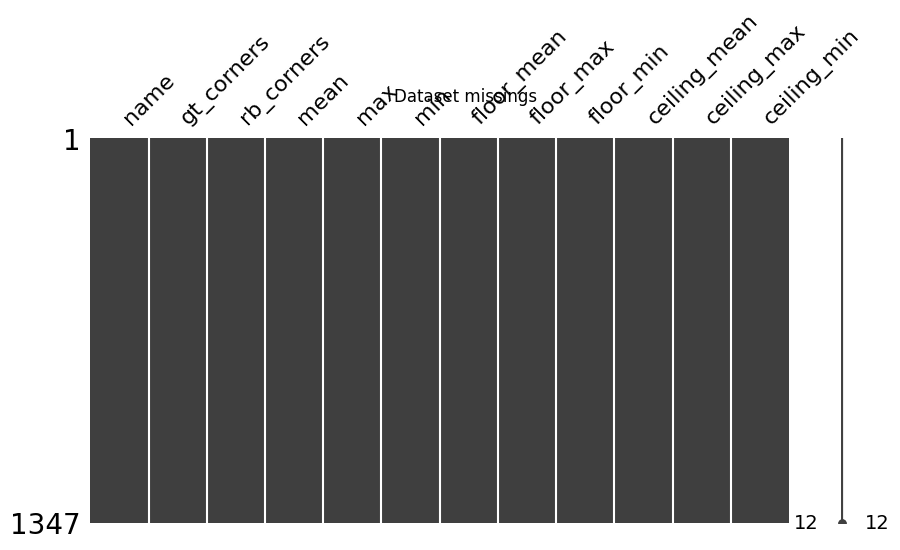

In [7]:
plot_drawer.draw_missings(data, figsize=(10,5), title="Dataset missings");

Taking a look on basic data statistics

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gt_corners,1347.0,4.307350,0.814412,4.000000,4.000000,4.000000,4.000000,10.000000
rb_corners,1347.0,4.307350,0.814412,4.000000,4.000000,4.000000,4.000000,10.000000
mean,1347.0,12.895320,21.839948,0.192973,0.658488,2.123456,14.810982,121.301055
max,1347.0,25.448011,42.758159,0.323886,1.243804,4.703514,28.312051,179.165483
min,1347.0,2.920388,9.258972,0.007456,0.147432,0.279876,0.674444,81.764483
floor_mean,1347.0,11.022443,19.136320,0.134686,0.514150,1.932503,13.430288,121.244083
floor_max,1347.0,20.405499,33.189081,0.178059,0.888043,4.008014,24.986504,177.961811
floor_min,1347.0,3.146246,9.559611,0.007456,0.164668,0.304374,0.801416,81.791505
ceiling_mean,1347.0,14.768198,26.047057,0.123169,0.742915,2.159995,15.150233,157.387474
ceiling_max,1347.0,24.848020,42.345579,0.220846,1.180960,3.777277,27.551533,179.165483


### 2. Model estimation

#### 2.1 Corners count accuracy estimation

In [9]:
data.gt_corners.value_counts()

gt_corners
4     1163
6      162
8       21
10       1
Name: count, dtype: int64

In [10]:
data.rb_corners.value_counts()

rb_corners
4     1163
6      162
8       21
10       1
Name: count, dtype: int64

gt_corners and rb_corners are categorical features. So we can consider task of predicting count of corners as a multiclassfication to estimate model quality in this case.

Also we can see that classes in our cases are imbalanced. Just to notice.

Let's take a look at precision, recall, f1-score metrics for each of rooms types:

In [11]:
print(classification_report(data.gt_corners, data.rb_corners))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00      1163
           6       1.00      1.00      1.00       162
           8       1.00      1.00      1.00        21
          10       1.00      1.00      1.00         1

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347



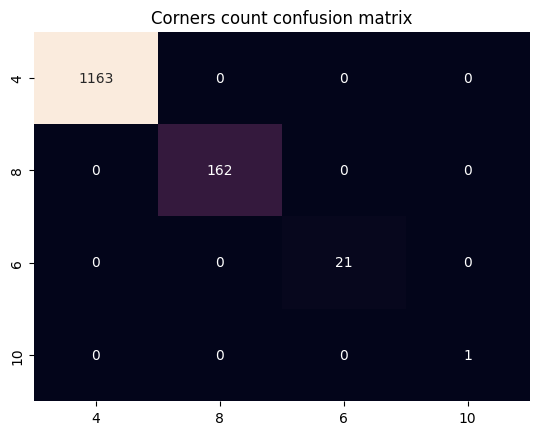

In [12]:
plot_drawer.draw_confusion_matrix(data.gt_corners, data.rb_corners, "Corners count confusion matrix");

From these plots we can see that model predicts corners count without mistakes based on our dataset!

#### 2.2 Corners degrees accuracy estimation

Now let's estimate corners degrees deviations

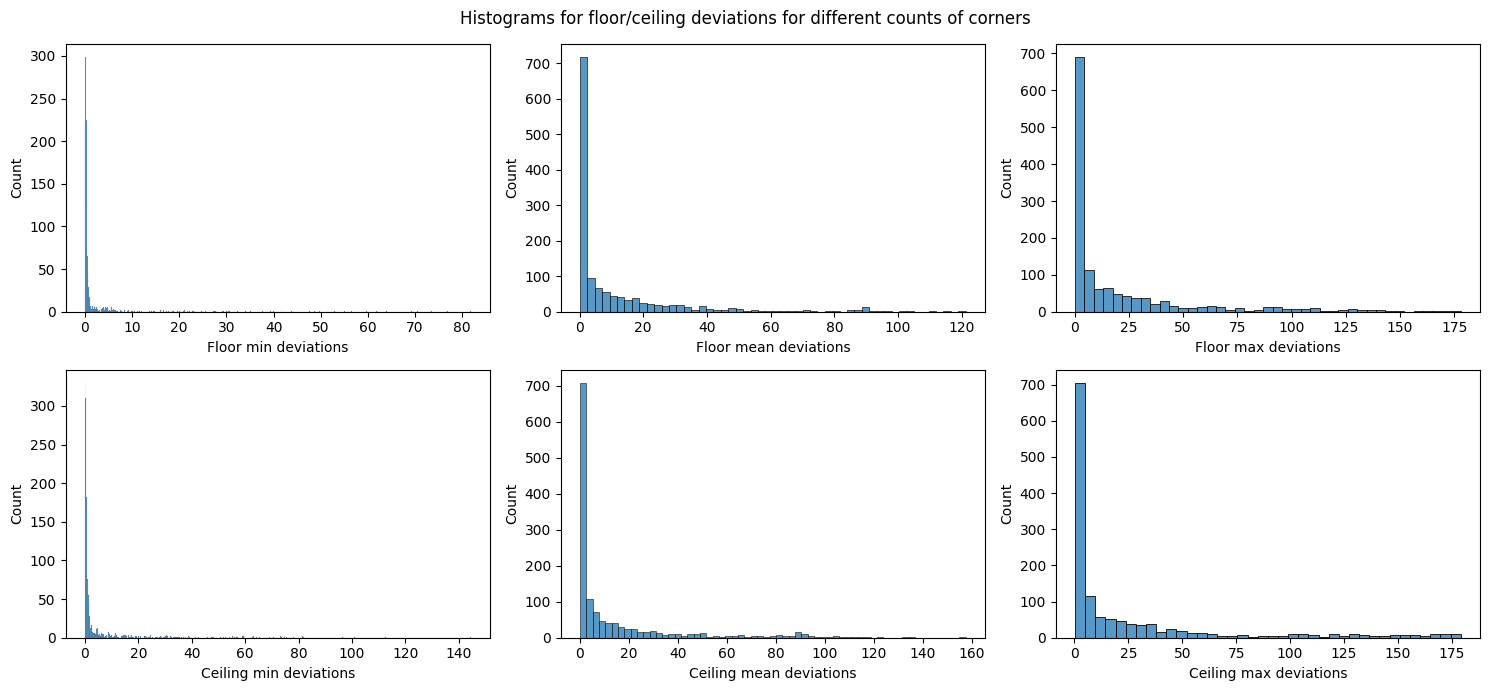

In [13]:
plot_drawer.draw_plots_table(
    rows=2, 
    cols=3, 
    figsize=(15, 7),
    plot_fn=sns.histplot,
    data_list=[data['floor_min'], data['floor_mean'], data['floor_max'], data['ceiling_min'], data['ceiling_mean'], data['ceiling_max']],
    labels=['Floor min deviations', 'Floor mean deviations', 'Floor max deviations', 'Ceiling min deviations', 'Ceiling mean deviations', 'Ceiling max deviations'],
    title='Histograms for floor/ceiling deviations for different counts of corners');

Histograms are not very informative in this case. Let's display boxplots

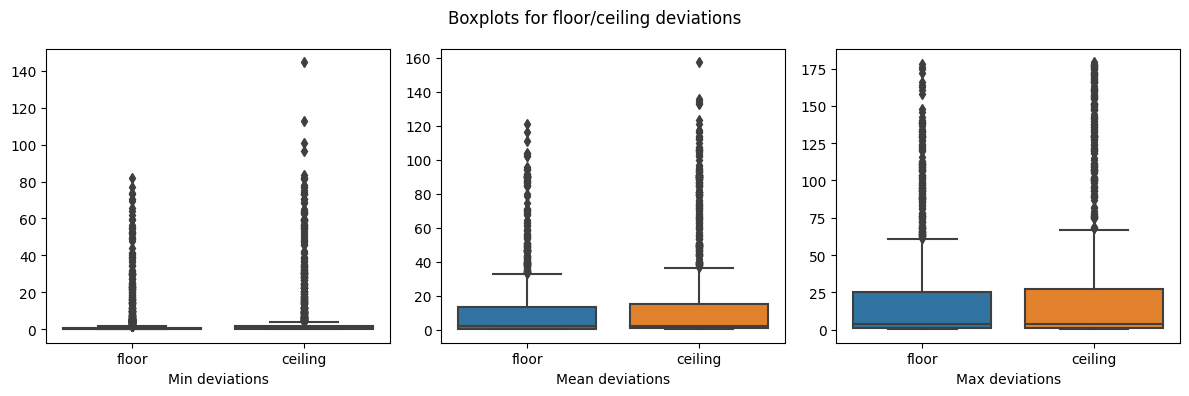

In [14]:
plot_drawer.draw_plots_table(
    rows=1, 
    cols=3, 
    figsize=(12, 4),
    plot_fn=sns.boxplot,
    data_list=[data[['floor_min', 'ceiling_min']], data[['floor_mean', 'ceiling_mean']], data[['floor_max', 'ceiling_max']]],
    xticklabels=['floor', 'ceiling'],
    labels=['Min deviations', 'Mean deviations', 'Max deviations'],
    title='Boxplots for floor/ceiling deviations');

We can see that ceilings have a little bit higher errors

Now let's take a look on corners deviations paying attention to count of corners in a room

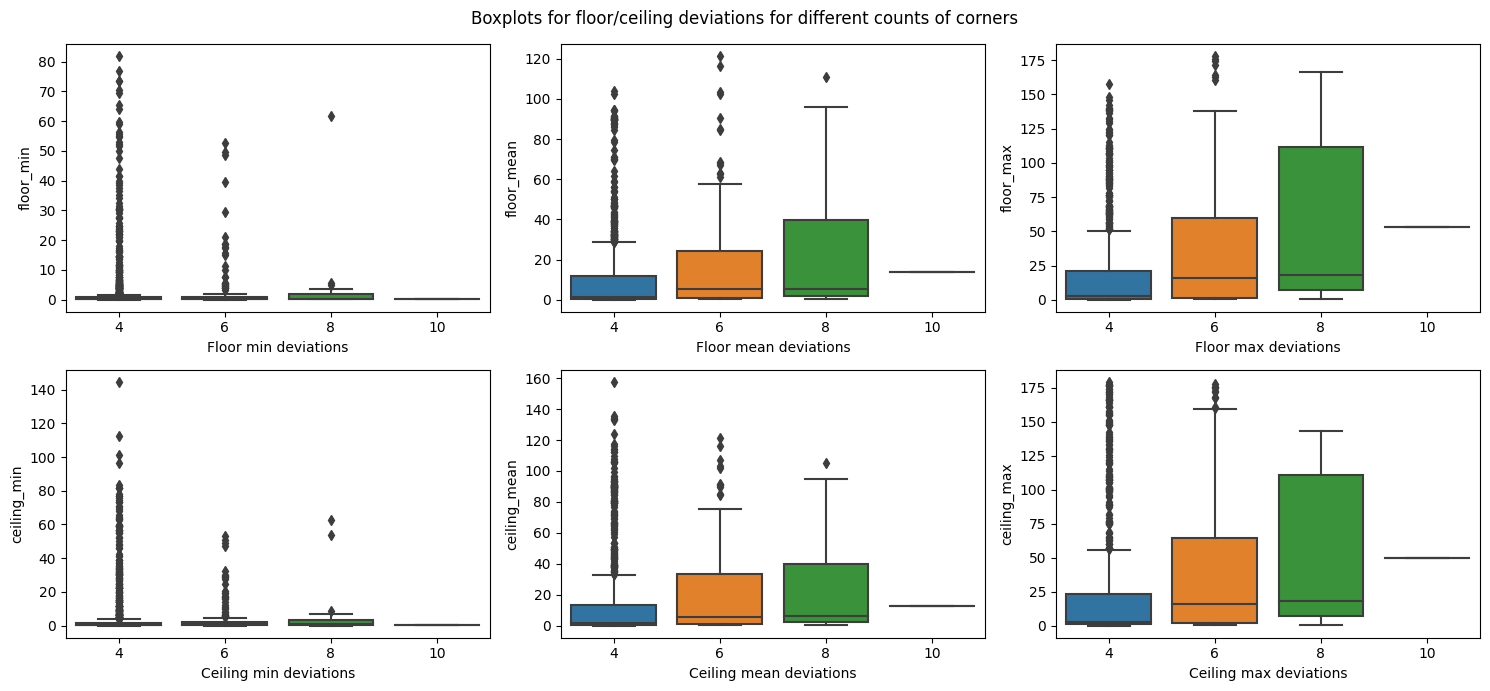

In [15]:
plot_drawer.draw_plots_table(
    rows=2, 
    cols=3, 
    figsize=(15, 7),
    plot_fn=sns.boxplot,
    x_data=data['gt_corners'], 
    y_list=[data['floor_min'], data['floor_mean'], data['floor_max'], data['ceiling_min'], data['ceiling_mean'], data['ceiling_max']], 
    data_list=[data, data, data, data, data, data],
    labels=['Floor min deviations', 'Floor mean deviations', 'Floor max deviations', 'Ceiling min deviations', 'Ceiling mean deviations', 'Ceiling max deviations'],
    title='Boxplots for floor/ceiling deviations for different counts of corners');

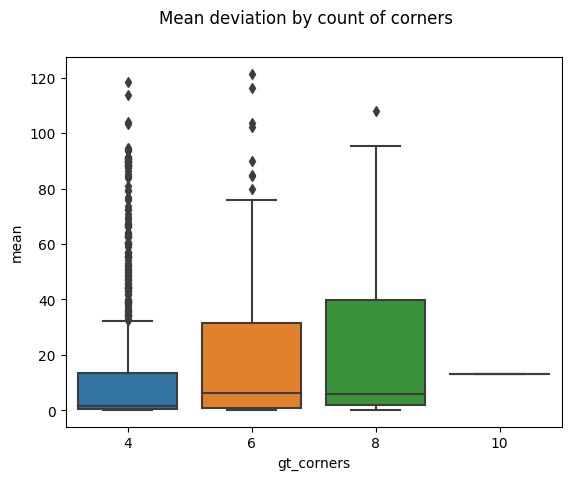

In [16]:
plot_drawer.draw_boxplot(x=data.gt_corners, y=data['mean'], data=data, title="Mean deviation by count of corners");

From info above we can see that with bigger count of corners model makes larger corners degrees errors (we have larger media deviations from true values)

Same conclusion probably will be true about ceiling corners. Let's check it

In [17]:
data.groupby(by=data.gt_corners)[['floor_mean', 'ceiling_mean']].median()

,floor_mean,ceiling_mean
gt_corners,,
4,1.506429,1.864892
6,5.474281,5.857074
8,5.506125,6.156627
10,13.675920,12.729630


Model has a little bit worse corners degrees predictions for ceilings corners then for floors.<br>
We have only one 10 corners room here, that's why it will be wrong to reject this idea because of one case when ceiling_mean is less then floor_mean.

Let's display trend of corners degrees deviations in depence of corners counts

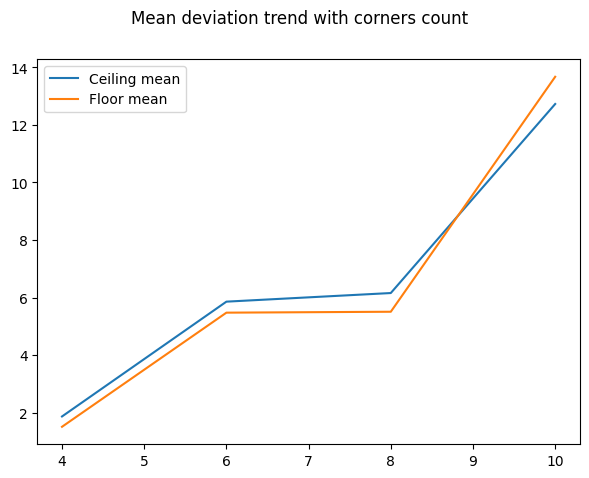

In [18]:
plot_drawer.draw_plots(
    [data.groupby(by=data.gt_corners)['ceiling_mean'].median(), data.groupby(by=data.gt_corners)['floor_mean'].median()], 
    figsize=(7, 5), 
    labels=['Ceiling mean', 'Floor mean'],
    title="Mean deviation trend with corners count");

Trend is obvious in both (ceiling mean, floor mean) cases. So, we can make a coclusion that with rooms that have big amount of corners (6,8,10) model works worse than with 4 corners traditional rooms.
<br>That's not surprising taking into consideration imbalanced classes.

To check that this trend even in case when we have similar count of values for each type of rooms let's repeat this check after undersampling. (10 corners room was excluded because we have only one value for it)

In [19]:
X = data[data['gt_corners'] != 10].drop(['name', 'gt_corners', 'rb_corners'], axis=1)
y = data[data['gt_corners'] != 10]['gt_corners']

In [20]:
undersampler = RandomUnderSampler(random_state=42) 

X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [21]:
y_resampled.value_counts()

gt_corners
4    21
6    21
8    21
Name: count, dtype: int64

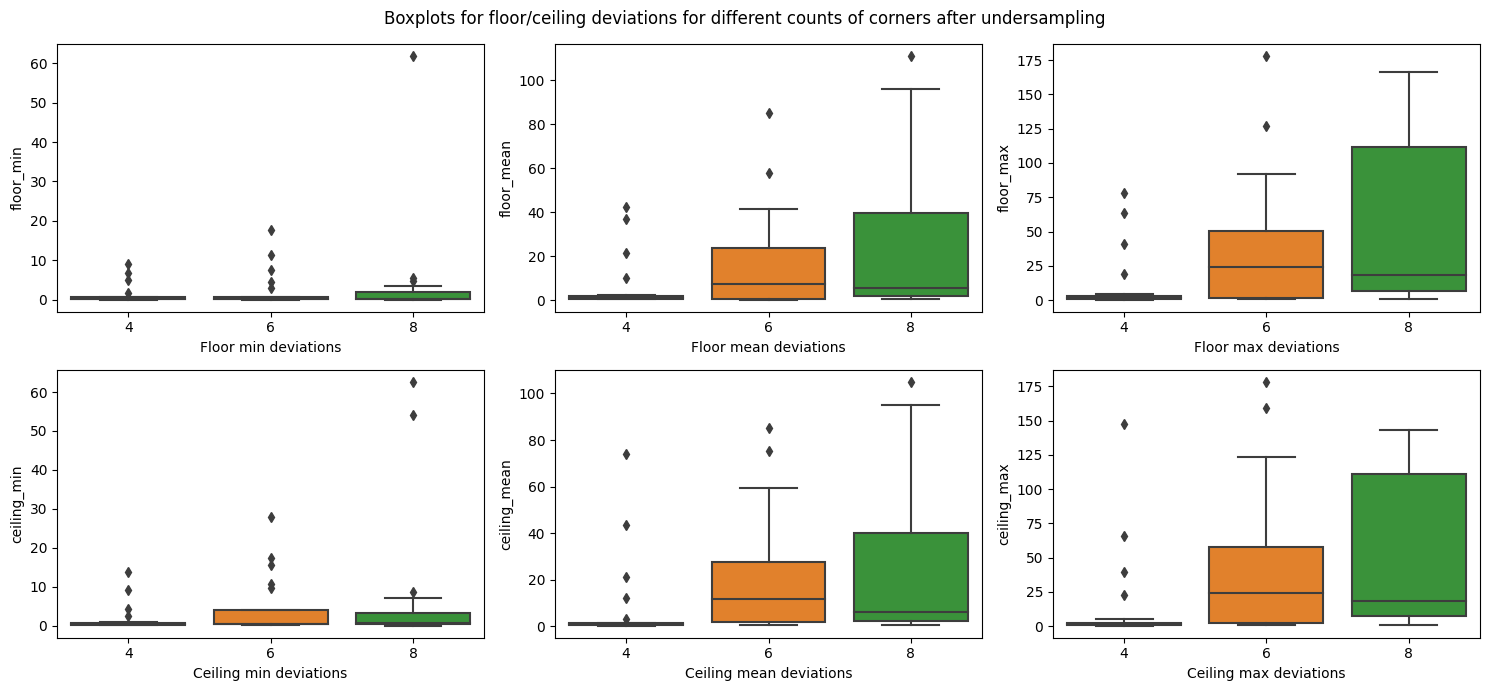

In [22]:
plot_drawer.draw_plots_table(
    rows=2, 
    cols=3, 
    figsize=(15, 7),
    plot_fn=sns.boxplot,
    x_data=y_resampled, 
    y_list=[X_resampled['floor_min'], X_resampled['floor_mean'], X_resampled['floor_max'], X_resampled['ceiling_min'], X_resampled['ceiling_mean'], X_resampled['ceiling_max']], 
    data_list=[X_resampled, X_resampled, X_resampled, X_resampled, X_resampled, X_resampled],
    labels=['Floor min deviations', 'Floor mean deviations', 'Floor max deviations', 'Ceiling min deviations', 'Ceiling mean deviations', 'Ceiling max deviations'],
    title='Boxplots for floor/ceiling deviations for different counts of corners after undersampling');

Results is the same. We have larger deviations for larger count of corners

Probably model was trained on various 4 corners rooms and estimates them better than more rare 6, 8, 10 rooms talking about corners degree estimation.

But in both cases 4 or 6, 8, 10 corners rooms model perfectly estimates count of corners.
<br>That's easy to check.

In [23]:
len(data) == (data['gt_corners'] == data['rb_corners']).sum()

True

### 3. Conclusions

Based on info provided we can make several conclusions:
- model perfectly predicts count of corners in room
- model estimates corners degrees values better for 4 corners rooms than for 6, 8, 10 corners rooms because of class imbalance
- model has a little bit larger degrees deviations for ceiling corners then for floors. Ceiling scores have larger outliers